## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="relu")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [16]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.8676 - acc: 0.3285 - val_loss: 1.9085 - val_acc: 0.2937
Epoch 2/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.8388 - acc: 0.3294 - val_loss: 1.8177 - val_acc: 0.3498
Epoch 3/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.9034 - acc: 0.3090 - val_loss: 1.8441 - val_acc: 0.3454
Epoch 4/500
50000/50000 [==============================] - 16s 330us/step - loss: 1.7996 - acc: 0.3530 - val_loss: 1.9570 - val_acc: 0.2357
Epoch 5/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.8265 - acc: 0.3389 - val_loss: 1.7977 - val_acc: 0.3667
Epoch 6/500
50000/50000 [==============================] - 16s 329us/step - loss: 2.1008 - acc: 0.1969 - val_loss: 1.9008 - val_acc: 0.3346
Epoch 7/500
50000/50000 [==============================] - 17s 338us/step - loss: 1.8976 - acc: 0.3039 - val_l

Epoch 59/500
50000/50000 [==============================] - 21s 417us/step - loss: 1.8377 - acc: 0.3413 - val_loss: 2.2309 - val_acc: 0.1335
Epoch 60/500
50000/50000 [==============================] - 15s 292us/step - loss: 2.0607 - acc: 0.2323 - val_loss: 1.9929 - val_acc: 0.3079
Epoch 61/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.8570 - acc: 0.3403 - val_loss: 1.8706 - val_acc: 0.3387
Epoch 62/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.7736 - acc: 0.3640 - val_loss: 1.7966 - val_acc: 0.3582
Epoch 63/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.9119 - acc: 0.2940 - val_loss: 1.9908 - val_acc: 0.2311
Epoch 64/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.8890 - acc: 0.2936 - val_loss: 1.8220 - val_acc: 0.3432
Epoch 65/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.9955 - acc: 0.2279 - val_loss: 1.9184 - val_acc: 0.2732
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.6761 - acc: 0.4033 - val_loss: 1.6410 - val_acc: 0.4281
Epoch 118/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.6803 - acc: 0.4014 - val_loss: 1.6210 - val_acc: 0.4277
Epoch 119/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.5623 - acc: 0.4384 - val_loss: 1.5875 - val_acc: 0.4361
Epoch 120/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.5301 - acc: 0.4519 - val_loss: 1.5788 - val_acc: 0.4426
Epoch 121/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.5857 - acc: 0.4362 - val_loss: 1.5842 - val_acc: 0.4442
Epoch 122/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.7366 - acc: 0.3921 - val_loss: 1.7840 - val_acc: 0.3829
Epoch 123/500
50000/50000 [==============================] - 15s 299us/step - loss: 1.6256 - acc: 0.4277 - val_loss: 1.6272 - val_acc: 0.4347
Epoch 

Epoch 175/500
50000/50000 [==============================] - 19s 381us/step - loss: 1.5498 - acc: 0.4484 - val_loss: 1.5907 - val_acc: 0.4391
Epoch 176/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.5638 - acc: 0.4469 - val_loss: 1.5879 - val_acc: 0.4499
Epoch 177/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.5066 - acc: 0.4621 - val_loss: 1.5846 - val_acc: 0.4545
Epoch 178/500
50000/50000 [==============================] - 20s 397us/step - loss: 1.5124 - acc: 0.4601 - val_loss: 1.5715 - val_acc: 0.4437
Epoch 179/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.4891 - acc: 0.4658 - val_loss: 1.5522 - val_acc: 0.4596
Epoch 180/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.4855 - acc: 0.4668 - val_loss: 1.6212 - val_acc: 0.4367
Epoch 181/500
50000/50000 [==============================] - 14s 286us/step - loss: 1.5732 - acc: 0.4443 - val_loss: 1.6245 - val_acc: 0.4424
Epoch 

Epoch 233/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.6908 - acc: 0.4059 - val_loss: 1.7115 - val_acc: 0.4023
Epoch 234/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.8925 - acc: 0.3214 - val_loss: 1.8807 - val_acc: 0.3265
Epoch 235/500
50000/50000 [==============================] - 13s 260us/step - loss: 1.7459 - acc: 0.3832 - val_loss: 1.7181 - val_acc: 0.4017
Epoch 236/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.6423 - acc: 0.4186 - val_loss: 1.6661 - val_acc: 0.4249
Epoch 237/500
50000/50000 [==============================] - 13s 262us/step - loss: 1.6056 - acc: 0.4387 - val_loss: 1.6664 - val_acc: 0.4273
Epoch 238/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.5694 - acc: 0.4494 - val_loss: 1.6228 - val_acc: 0.4488
Epoch 239/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.5456 - acc: 0.4583 - val_loss: 1.6425 - val_acc: 0.4553
Epoch 

Epoch 291/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.4242 - acc: 0.4896 - val_loss: 1.5093 - val_acc: 0.4745
Epoch 292/500
50000/50000 [==============================] - 15s 299us/step - loss: 1.4059 - acc: 0.4960 - val_loss: 1.5686 - val_acc: 0.4629
Epoch 293/500
50000/50000 [==============================] - 15s 299us/step - loss: 1.5800 - acc: 0.4337 - val_loss: 2.0392 - val_acc: 0.2967
Epoch 294/500
50000/50000 [==============================] - 15s 297us/step - loss: 1.8633 - acc: 0.3489 - val_loss: 1.8217 - val_acc: 0.3561
Epoch 295/500
50000/50000 [==============================] - 15s 295us/step - loss: 1.7369 - acc: 0.3898 - val_loss: 1.7531 - val_acc: 0.3980
Epoch 296/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.6641 - acc: 0.4229 - val_loss: 1.7115 - val_acc: 0.4144
Epoch 297/500
50000/50000 [==============================] - 20s 409us/step - loss: 1.6522 - acc: 0.4269 - val_loss: 1.6853 - val_acc: 0.4156
Epoch 

Epoch 349/500
50000/50000 [==============================] - 17s 343us/step - loss: 1.8018 - acc: 0.3638 - val_loss: 1.7263 - val_acc: 0.3819
Epoch 350/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.6290 - acc: 0.4243 - val_loss: 1.6558 - val_acc: 0.4302
Epoch 351/500
50000/50000 [==============================] - 22s 432us/step - loss: 1.5642 - acc: 0.4527 - val_loss: 1.6157 - val_acc: 0.4354
Epoch 352/500
50000/50000 [==============================] - 17s 336us/step - loss: 1.6088 - acc: 0.4383 - val_loss: 1.6566 - val_acc: 0.4318
Epoch 353/500
50000/50000 [==============================] - 16s 327us/step - loss: 1.5630 - acc: 0.4530 - val_loss: 1.6042 - val_acc: 0.4455
Epoch 354/500
50000/50000 [==============================] - 17s 331us/step - loss: 1.5401 - acc: 0.4606 - val_loss: 1.5956 - val_acc: 0.4504
Epoch 355/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.5050 - acc: 0.4705 - val_loss: 1.5839 - val_acc: 0.4507
Epoch 

Epoch 407/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.4044 - acc: 0.4963 - val_loss: 1.5524 - val_acc: 0.4665
Epoch 408/500
50000/50000 [==============================] - 13s 266us/step - loss: 1.4804 - acc: 0.4735 - val_loss: 1.5222 - val_acc: 0.4812
Epoch 409/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.3533 - acc: 0.5144 - val_loss: 1.5348 - val_acc: 0.4809
Epoch 410/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.3792 - acc: 0.5052 - val_loss: 1.5435 - val_acc: 0.4867
Epoch 411/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.5661 - acc: 0.4491 - val_loss: 1.5636 - val_acc: 0.4618
Epoch 412/500
50000/50000 [==============================] - 13s 262us/step - loss: 1.4449 - acc: 0.4873 - val_loss: 1.6399 - val_acc: 0.4473
Epoch 413/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.4621 - acc: 0.4823 - val_loss: 1.5212 - val_acc: 0.4774
Epoch 

Epoch 465/500
50000/50000 [==============================] - 14s 276us/step - loss: 1.4804 - acc: 0.4808 - val_loss: 1.5659 - val_acc: 0.4643
Epoch 466/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.4522 - acc: 0.4866 - val_loss: 1.5498 - val_acc: 0.4691
Epoch 467/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.4425 - acc: 0.4883 - val_loss: 1.5400 - val_acc: 0.4634
Epoch 468/500
50000/50000 [==============================] - 14s 276us/step - loss: 1.4381 - acc: 0.4913 - val_loss: 1.5413 - val_acc: 0.4733
Epoch 469/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.4524 - acc: 0.4860 - val_loss: 2.1353 - val_acc: 0.2549
Epoch 470/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.5680 - acc: 0.4586 - val_loss: 1.5409 - val_acc: 0.4659
Epoch 471/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.4261 - acc: 0.4961 - val_loss: 1.5272 - val_acc: 0.4788
Epoch 

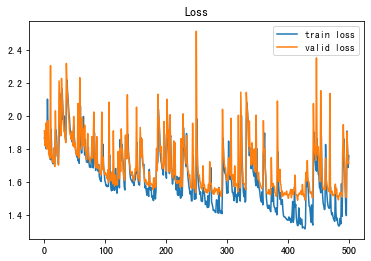

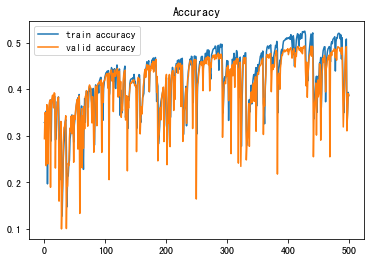

In [17]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# 換成ＳＧＤ 

In [18]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [21]:
model.fit(x_train, y_train,
         epochs=500,
         batch_size=256,
         validation_data = (x_test,y_test),
         shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 262us/step - loss: 1.6567 - acc: 0.4088 - val_loss: 1.7066 - val_acc: 0.3884
Epoch 2/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.6524 - acc: 0.4107 - val_loss: 1.7026 - val_acc: 0.3906
Epoch 3/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.6484 - acc: 0.4118 - val_loss: 1.6998 - val_acc: 0.3921
Epoch 4/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.6445 - acc: 0.4125 - val_loss: 1.6962 - val_acc: 0.3946
Epoch 5/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.6410 - acc: 0.4134 - val_loss: 1.6941 - val_acc: 0.3955
Epoch 6/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.6368 - acc: 0.4146 - val_loss: 1.6920 - val_acc: 0.3952
Epoch 7/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.6337 - acc: 0.4154 - val_loss: 

50000/50000 [==============================] - 9s 173us/step - loss: 1.5553 - acc: 0.4429 - val_loss: 1.6340 - val_acc: 0.4170
Epoch 60/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.5531 - acc: 0.4437 - val_loss: 1.6346 - val_acc: 0.4174
Epoch 61/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.5520 - acc: 0.4439 - val_loss: 1.6343 - val_acc: 0.4174
Epoch 62/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.5508 - acc: 0.4446 - val_loss: 1.6327 - val_acc: 0.4179
Epoch 63/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.5493 - acc: 0.4445 - val_loss: 1.6331 - val_acc: 0.4186
Epoch 64/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.5483 - acc: 0.4447 - val_loss: 1.6295 - val_acc: 0.4168
Epoch 65/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.5473 - acc: 0.4446 - val_loss: 1.6299 - val_acc: 0.4175
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 10s 195us/step - loss: 1.8047 - acc: 0.3237 - val_loss: 1.8362 - val_acc: 0.3147
Epoch 118/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.7932 - acc: 0.3304 - val_loss: 1.8254 - val_acc: 0.3207
Epoch 119/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.7825 - acc: 0.3365 - val_loss: 1.8159 - val_acc: 0.3266
Epoch 120/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.7727 - acc: 0.3427 - val_loss: 1.8079 - val_acc: 0.3320
Epoch 121/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.7634 - acc: 0.3488 - val_loss: 1.7996 - val_acc: 0.3389
Epoch 122/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.7547 - acc: 0.3547 - val_loss: 1.7920 - val_acc: 0.3448
Epoch 123/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.7465 - acc: 0.3606 - val_loss: 1.7856 - val_acc: 0.3495
Epoch 124/500
50000/500

Epoch 175/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.5913 - acc: 0.4496 - val_loss: 1.6588 - val_acc: 0.4239
Epoch 176/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.5897 - acc: 0.4496 - val_loss: 1.6570 - val_acc: 0.4247
Epoch 177/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.5881 - acc: 0.4498 - val_loss: 1.6559 - val_acc: 0.4248
Epoch 178/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.5865 - acc: 0.4499 - val_loss: 1.6546 - val_acc: 0.4245
Epoch 179/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.5851 - acc: 0.4499 - val_loss: 1.6539 - val_acc: 0.4239
Epoch 180/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.5848 - acc: 0.4487 - val_loss: 1.6485 - val_acc: 0.4230
Epoch 181/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.5839 - acc: 0.4480 - val_loss: 1.6479 - val_acc: 0.4233
Epoch 182

Epoch 233/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.5316 - acc: 0.4549 - val_loss: 1.6069 - val_acc: 0.4303
Epoch 234/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.5304 - acc: 0.4552 - val_loss: 1.6058 - val_acc: 0.4300
Epoch 235/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5292 - acc: 0.4552 - val_loss: 1.6047 - val_acc: 0.4300
Epoch 236/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.5278 - acc: 0.4553 - val_loss: 1.6037 - val_acc: 0.4302
Epoch 237/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.5266 - acc: 0.4554 - val_loss: 1.6028 - val_acc: 0.4301
Epoch 238/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.5255 - acc: 0.4558 - val_loss: 1.6024 - val_acc: 0.4300
Epoch 239/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5242 - acc: 0.4561 - val_loss: 1.6013 - val_acc: 0.4300
Epoch 240/500

50000/50000 [==============================] - 9s 187us/step - loss: 1.4911 - acc: 0.4642 - val_loss: 1.5795 - val_acc: 0.4392
Epoch 292/500
50000/50000 [==============================] - 10s 190us/step - loss: 1.4911 - acc: 0.4643 - val_loss: 1.5788 - val_acc: 0.4390
Epoch 293/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.4902 - acc: 0.4645 - val_loss: 1.5808 - val_acc: 0.4392
Epoch 294/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.4895 - acc: 0.4648 - val_loss: 1.5819 - val_acc: 0.4399
Epoch 295/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.4892 - acc: 0.4645 - val_loss: 1.5822 - val_acc: 0.4393
Epoch 296/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.4886 - acc: 0.4647 - val_loss: 1.5820 - val_acc: 0.4399
Epoch 297/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.4883 - acc: 0.4648 - val_loss: 1.5816 - val_acc: 0.4403
Epoch 298/500
50000/5000

50000/50000 [==============================] - 10s 193us/step - loss: 1.4740 - acc: 0.4702 - val_loss: 1.5779 - val_acc: 0.4453
Epoch 350/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.4735 - acc: 0.4701 - val_loss: 1.5770 - val_acc: 0.4450
Epoch 351/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.4733 - acc: 0.4699 - val_loss: 1.5759 - val_acc: 0.4450
Epoch 352/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.4731 - acc: 0.4701 - val_loss: 1.5765 - val_acc: 0.4452
Epoch 353/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4731 - acc: 0.4700 - val_loss: 1.5769 - val_acc: 0.4451
Epoch 354/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.4729 - acc: 0.4700 - val_loss: 1.5772 - val_acc: 0.4451
Epoch 355/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.4726 - acc: 0.4700 - val_loss: 1.5772 - val_acc: 0.4449
Epoch 356/500
50000/5000

50000/50000 [==============================] - 9s 181us/step - loss: 1.4684 - acc: 0.4737 - val_loss: 1.5716 - val_acc: 0.4497
Epoch 408/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.4674 - acc: 0.4743 - val_loss: 1.5715 - val_acc: 0.4495
Epoch 409/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.4670 - acc: 0.4740 - val_loss: 1.5704 - val_acc: 0.4494
Epoch 410/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4664 - acc: 0.4741 - val_loss: 1.5723 - val_acc: 0.4501
Epoch 411/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.4657 - acc: 0.4742 - val_loss: 1.5718 - val_acc: 0.4503
Epoch 412/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.4652 - acc: 0.4743 - val_loss: 1.5715 - val_acc: 0.4504
Epoch 413/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.4649 - acc: 0.4743 - val_loss: 1.5712 - val_acc: 0.4501
Epoch 414/500
50000/500

50000/50000 [==============================] - 9s 178us/step - loss: 1.4577 - acc: 0.4774 - val_loss: 1.5682 - val_acc: 0.4540
Epoch 466/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.4576 - acc: 0.4773 - val_loss: 1.5672 - val_acc: 0.4542
Epoch 467/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.4577 - acc: 0.4774 - val_loss: 1.5670 - val_acc: 0.4544
Epoch 468/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.4575 - acc: 0.4777 - val_loss: 1.5670 - val_acc: 0.4542
Epoch 469/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4573 - acc: 0.4774 - val_loss: 1.5669 - val_acc: 0.4544
Epoch 470/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.4572 - acc: 0.4777 - val_loss: 1.5677 - val_acc: 0.4546
Epoch 471/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.4571 - acc: 0.4777 - val_loss: 1.5676 - val_acc: 0.4547
Epoch 472/500
50000/50000 [

In [ ]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()